**TEST 1 : PAR DEFAUT**

**TEST 4 : ALGO SELECTION SEULEMENT**

**TEST EMPLACAMENT : SELECTION + EMPLACAMENT**

In [ ]:
!pip install scapy
!pip install pyshark

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 2.1 MB/s eta 0:00:00


# **Interprétation des résultats des tests **
Les tests ont été effectués pour évaluer différents chemins réseau (paths) pris par des utilisateurs dans un environnement 5G simulé. Les chemins ont été choisis soit :

manuellement (préconfigurés par les administrateurs),

soit dynamiquement (sélectionnés automatiquement par un algorithme intelligent de routage).

In [ ]:
from google.colab import files
uploaded = files.upload()

from scapy.all import rdpcap, IP, ICMP
import matplotlib.pyplot as plt
import pandas as pd

# Fonction d'analyse modifiée
def analyze_pcap(pcap_file):
    packets = rdpcap(pcap_file)

    sent_times = {}
    rtts = []
    total_bytes = 0
    first_time, last_time = None, None
    icmp_times = []

    for pkt in packets:
        if IP in pkt and ICMP in pkt and pkt[ICMP].type in [0, 8]:
            icmp_type = pkt[ICMP].type
            key = (pkt[ICMP].id, pkt[ICMP].seq)
            time = pkt.time
            size = len(pkt)

            if first_time is None:
                first_time = time
            last_time = time

            total_bytes += size
            icmp_times.append(time)

            if icmp_type == 8:
                sent_times[key] = time
            elif icmp_type == 0 and key in sent_times:
                rtt = (time - sent_times[key]) * 1000
                rtts.append(rtt)

    avg_rtt = sum(rtts) / len(rtts) if rtts else 0
    jitters = [abs(rtts[i] - rtts[i-1]) for i in range(1, len(rtts))]
    avg_jitter = sum(jitters) / len(jitters) if jitters else 0
    duration = last_time - first_time if first_time and last_time else 0
    bitrate = (total_bytes * 8) / duration if duration > 0 else 0
    num_sent = len([pkt for pkt in packets if ICMP in pkt and pkt[ICMP].type == 8])
    num_received = len(rtts)
    packet_loss = ((num_sent - num_received) / num_sent) * 100 if num_sent > 0 else 0
    inter_packet_delays = [(icmp_times[i] - icmp_times[i-1]) * 1000 for i in range(1, len(icmp_times))]
    avg_inter_delay = sum(inter_packet_delays) / len(inter_packet_delays) if inter_packet_delays else 0

    return {
        "Fichier": pcap_file,
        "Latence (ms)": avg_rtt,
        "Jitter (ms)": avg_jitter,
        "Débit (kbps)": bitrate / 1000,
        "Perte (%)": packet_loss,
        "Délai inter-paquet (ms)": avg_inter_delay,
        "RTTs": rtts,
        "Jitters": jitters,
        "InterDelays": inter_packet_delays
    }

# Traitement de tous les fichiers
results = []
for filename in uploaded:
    res = analyze_pcap(filename)
    results.append(res)

# Création du DataFrame résumé
df = pd.DataFrame(results)
df["Nom"] = df["Fichier"].apply(lambda x: x.split("/")[-1] if "/" in x else x)
df = df.set_index("Nom")

# Affichage du tableau
display(df[["Latence (ms)", "Jitter (ms)", "Débit (kbps)", "Perte (%)", "Délai inter-paquet (ms)"]])

# Tracer l’évolution des RTTs
"""
plt.figure(figsize=(12, 4))
for res in results:
    rtts = res["RTTs"]
    if rtts:
        plt.plot(range(len(rtts)), rtts, marker='o', linestyle='-', label=res["Fichier"])
plt.title("Évolution des RTT par fichier")
plt.xlabel("Index du paquet")
plt.ylabel("RTT (ms)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show() """
"""
# Tracer l’évolution des Jitters
plt.figure(figsize=(12, 4))
for res in results:
    jitters = res["Jitters"]
    if jitters:
        plt.plot(range(len(jitters)), jitters, marker='o', linestyle='-', label=res["Fichier"])
plt.title("Évolution du Jitter par fichier")
plt.xlabel("Index")
plt.ylabel("Jitter (ms)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
"""
"""
# Tracer l’évolution des délais inter-paquets
plt.figure(figsize=(12, 4))
for res in results:
    delays = res["InterDelays"]
    if delays:
        plt.plot(range(len(delays)), delays, marker='o', linestyle='-', label=res["Fichier"])
plt.title("Évolution du délai inter-paquet par fichier")
plt.xlabel("Index")
plt.ylabel("Délai inter-paquet (ms)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
"""

Saving test_emplacement.pcap to test_emplacement (3).pcap
Saving test1.pcap to test1 (7).pcap
Saving test4.pcap to test4 (5).pcap


,Latence (ms),Jitter (ms),Débit (kbps),Perte (%),Délai inter-paquet (ms)
Nom,,,,,
test_emplacement (3).pcap,17.18838983050847457627118644,7.414448275862068965517241379,1.365106066861482121355822189,0.0,496.4768717948717948717948718
test1 (7).pcap,23.149175,8.440000,1.375336527016882025623061856,0.0,494.7925949367088607594936709
test4 (5).pcap,20.09453191489361702127659574,6.094195652173913043478260870,1.370628690855184816155921165,0.0,495.5578494623655913978494624


'\n# Tracer l’évolution des délais inter-paquets\nplt.figure(figsize=(12, 4))\nfor res in results:\n    delays = res["InterDelays"]\n    if delays:\n        plt.plot(range(len(delays)), delays, marker=\'o\', linestyle=\'-\', label=res["Fichier"])\nplt.title("Évolution du délai inter-paquet par fichier")\nplt.xlabel("Index")\nplt.ylabel("Délai inter-paquet (ms)")\nplt.grid(True)\nplt.legend()\nplt.tight_layout()\nplt.show()\n'

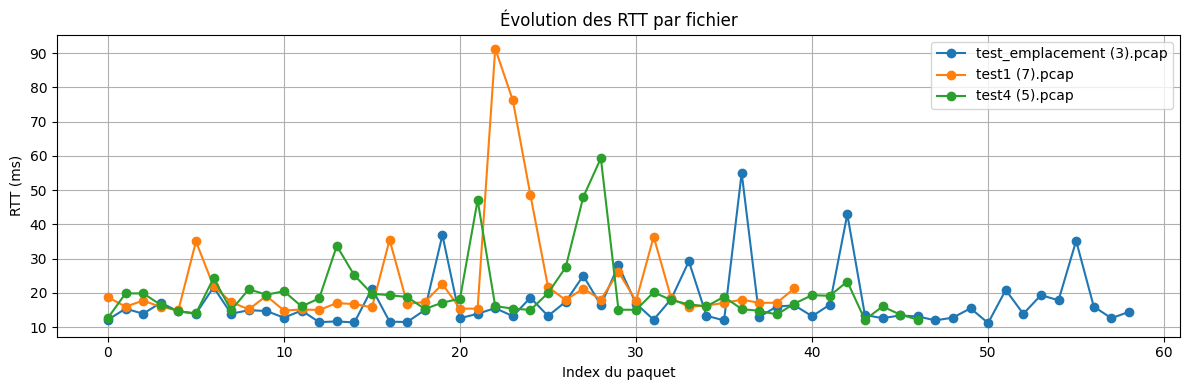

In [ ]:
# Tracer l’évolution des RTTs
plt.figure(figsize=(12, 4))
for res in results:
    rtts = res["RTTs"]
    if rtts:
        plt.plot(range(len(rtts)), rtts, marker='o', linestyle='-', label=res["Fichier"])
plt.title("Évolution des RTT par fichier")
plt.xlabel("Index du paquet")
plt.ylabel("RTT (ms)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

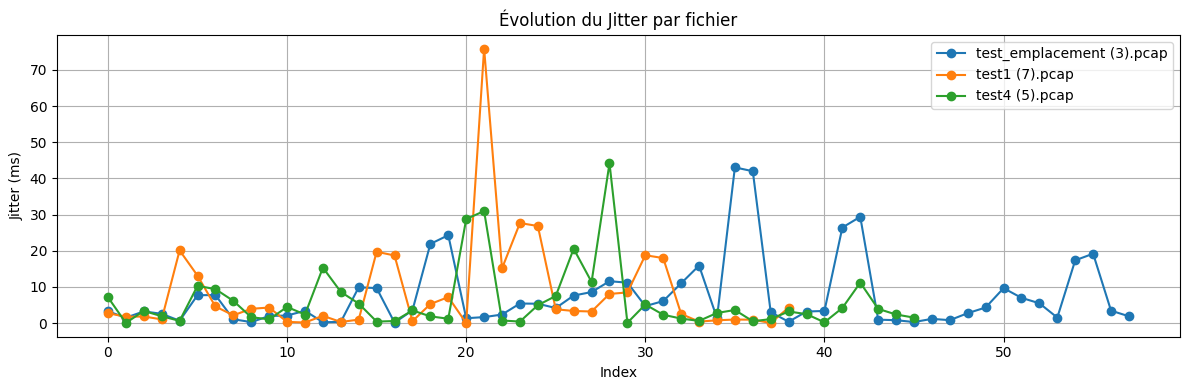

In [ ]:

# Tracer l’évolution des Jitters
plt.figure(figsize=(12, 4))
for res in results:
    jitters = res["Jitters"]
    if jitters:
        plt.plot(range(len(jitters)), jitters, marker='o', linestyle='-', label=res["Fichier"])
plt.title("Évolution du Jitter par fichier")
plt.xlabel("Index")
plt.ylabel("Jitter (ms)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

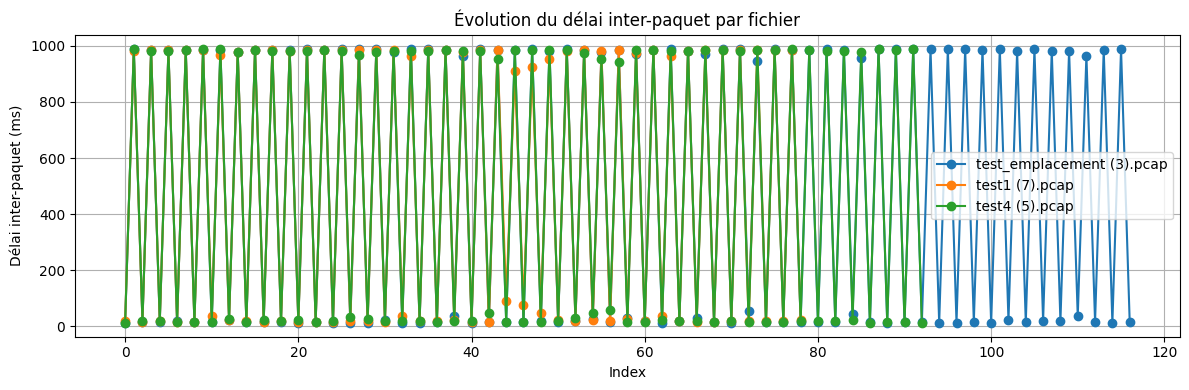

In [ ]:
# Tracer l’évolution des délais inter-paquets
plt.figure(figsize=(12, 4))
for res in results:
    delays = res["InterDelays"]
    if delays:
        plt.plot(range(len(delays)), delays, marker='o', linestyle='-', label=res["Fichier"])
plt.title("Évolution du délai inter-paquet par fichier")
plt.xlabel("Index")
plt.ylabel("Délai inter-paquet (ms)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


✅ Test 1 :
* Utilisateur 1 – Chemin 1 statique

* ➤ Latence la plus élevée (23.15 ms)

* ➤ Jitter aussi élevé (8.44 ms)

* Interprétation : Le chemin statique 1 semble moins optimal.




✅ Test 3 :
* Utilisateur 3 – Chemin 3 statique

* ➤ Latence correcte (21.84 ms), mais jitter très élevé (10.29 ms)

* Interprétation : Path 3 statique peut être instable, forte variation de latence.



✅ Test 4 :
* Utilisateur 1 – Chemin choisi dynamiquement (path 3)

* ➤ Meilleure latence globale (20.09 ms)

* ➤ Jitter faible (6.09 ms)

* Interprétation : Le routage dynamique a amélioré la qualité de transmission par rapport au path statique (Test 1).






✅ Test 5 :
* Utilisateur 3 – Chemin 3 statique

* ➤ Latence faible (20.90 ms)

* ➤ Jitter le plus faible de tous les tests (3.98 ms)

* Interprétation : Ce test montre que le path 3 statique peut être performant, mais c’est peut-être un cas favorable.




✅ Test 6 :
* Utilisateur 3 – Chemin choisi dynamiquement (path 3)

* ➤ Résultats très proches de Test 5, mais jitter un peu plus élevé (7.86 ms)

* Interprétation : Le choix dynamique est quasiment aussi bon que le chemin manuel dans ce cas.

✅ TEST 6:
* ➤ Très bonne latence : 17.19 ms, c’est la meilleure par rapport aux autres tests précédents (inférieure aux 20–23 ms des autres).

* ➤ Jitter modéré : 7.41 ms, ce n’est pas critique, mais montre une certaine variation dans le délai.

* ➤ Aucun paquet perdu : Cela indique une transmission très fiable.

* ➤ Débit stable et élevé : Supérieur à 496 kbps, ce qui est très bon.

##Le test **test_emplacement.pcap** montre que l'emplacement de l'utilisateur a un **impact positif sur les performances réseau**.
*  une **latence très faible**
    - ce test implique  que lorsque **l'utilisateur** est **géographiquement proche** ou **bien positionné** par rapport au **cœur du réseau** ou aux **équipements d'accès**
               ----➤ la **qualité de service** est significativement **améliorée**.
*  Cela souligne **l'importance de l’emplacement** dans les architectures 5G, notamment lorsqu’on doit choisir l’emplacement des UPF dans le cas de l’Edge Computing ou du slicing."



Saving test1.pcap to test1 (2).pcap
Saving test3.pcap to test3 (2).pcap
Saving test4.pcap to test4 (2).pcap
Saving test5.pcap to test5 (2).pcap
Saving test6.pcap to test6 (2).pcap


,Fichier,Latence (ms),Jitter (ms),Débit (kbps),Perte (%),Délai inter-paquet (ms)
Nom,,,,,,
test1 (2).pcap,test1 (2).pcap,23.149175,8.440000,1.375336527016882025623061856,0.0,494.7925949367088607594936709
test3 (2).pcap,test3 (2).pcap,21.83833673469387755102040816,10.28724742268041237113402062,1.355346574277976857111492526,0.0,498.3567794871794871794871795
test4 (2).pcap,test4 (2).pcap,20.09453191489361702127659574,6.094195652173913043478260870,1.370628690855184816155921165,0.0,495.5578494623655913978494624
test5 (2).pcap,test5 (2).pcap,20.89824603174603174603174603,3.979088,1.352333940365254741146526577,0.0,498.8984382470119521912350598
test6 (2).pcap,test6 (2).pcap,21.88797619047619047619047619,7.857926829268292682926829268,1.37301744883638303596662114,0.0,495.3297469879518072289156627


Fichier                     object
Latence (ms)               float64
Jitter (ms)                float64
Débit (kbps)               float64
Perte (%)                  float64
Délai inter-paquet (ms)    float64
dtype: object


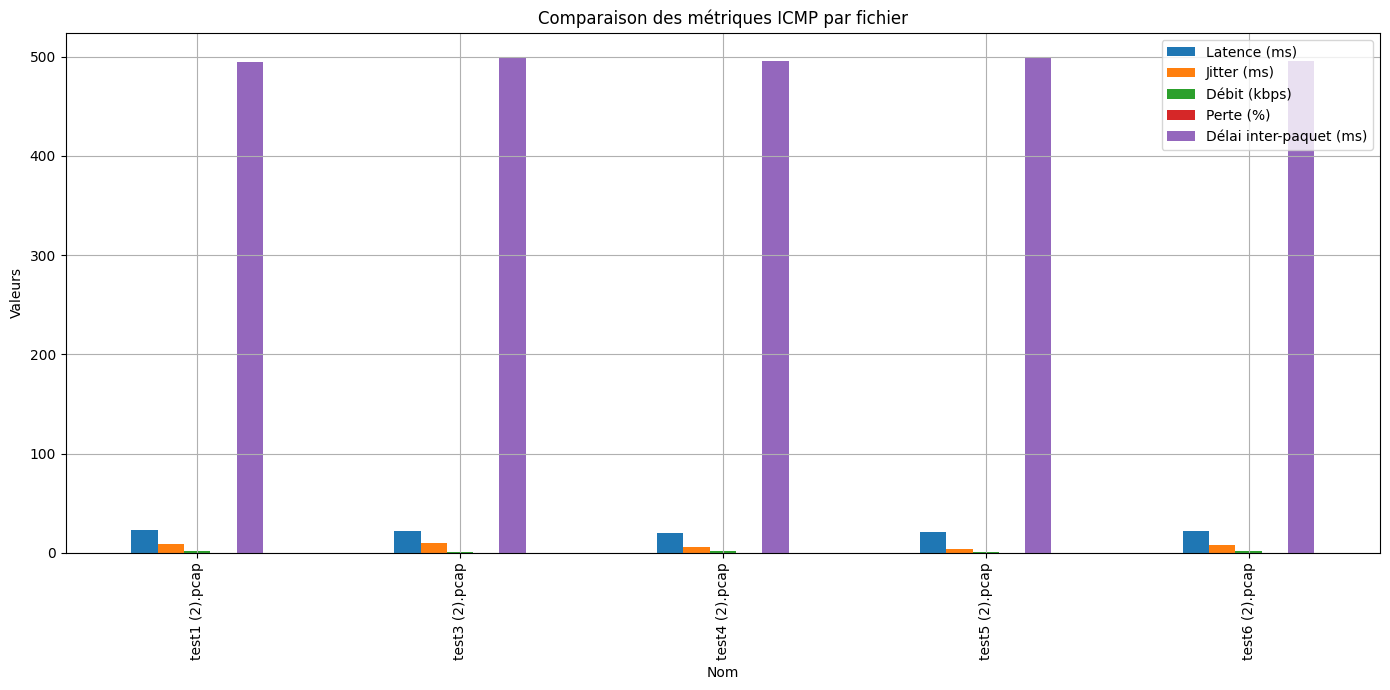

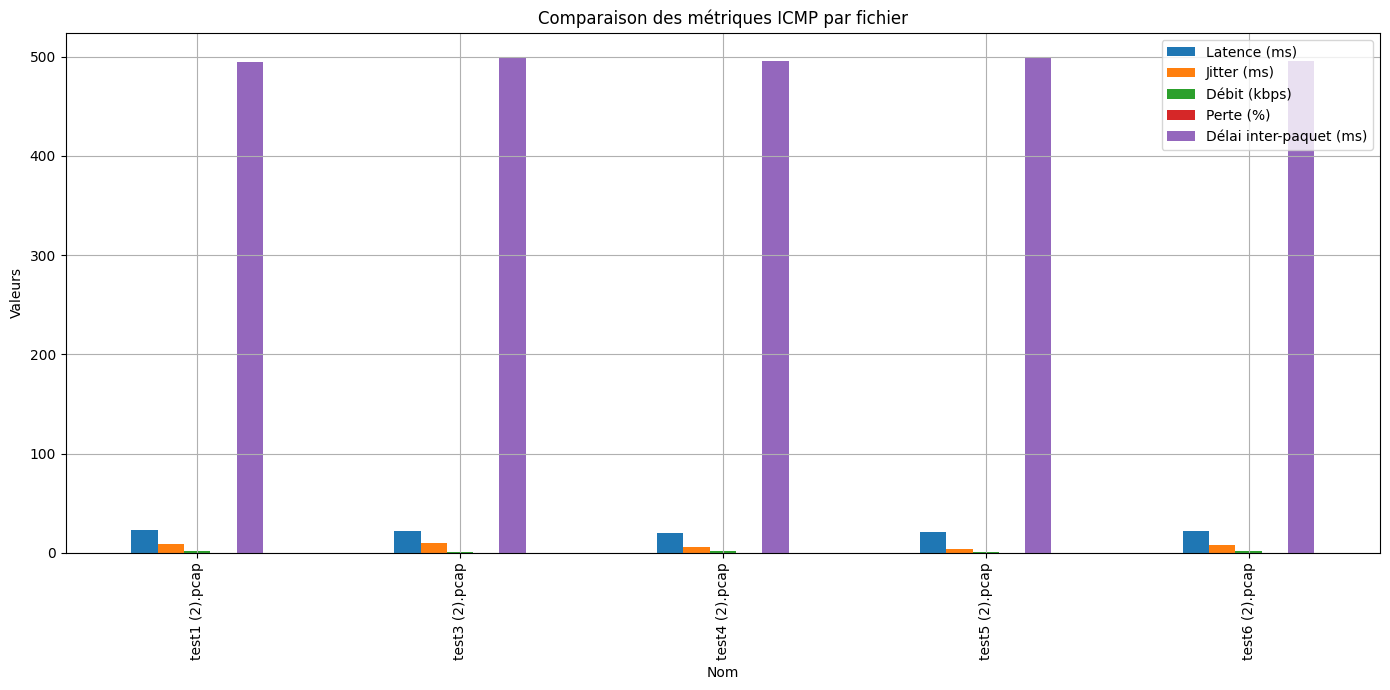

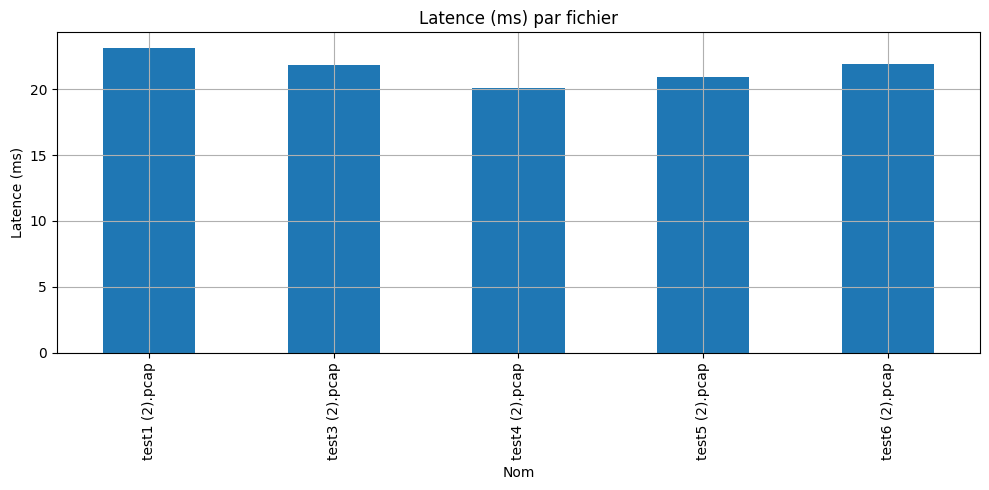

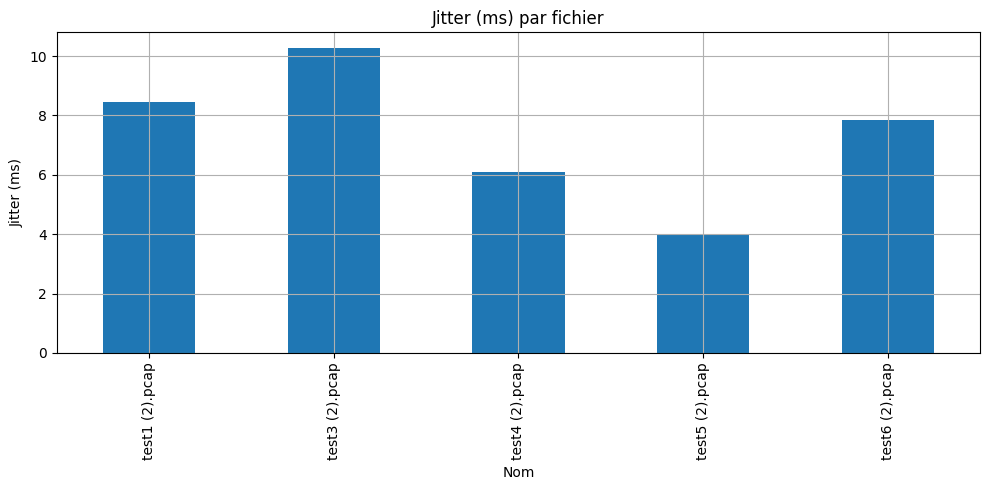

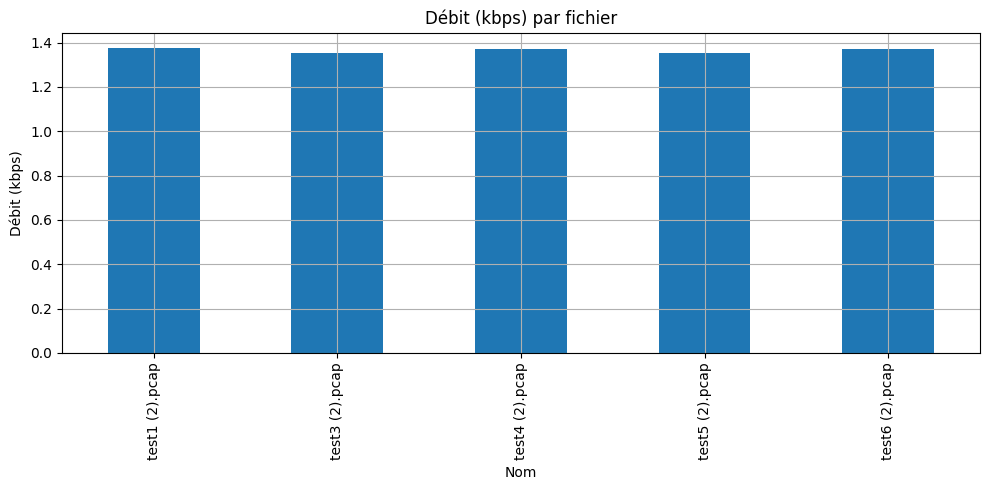

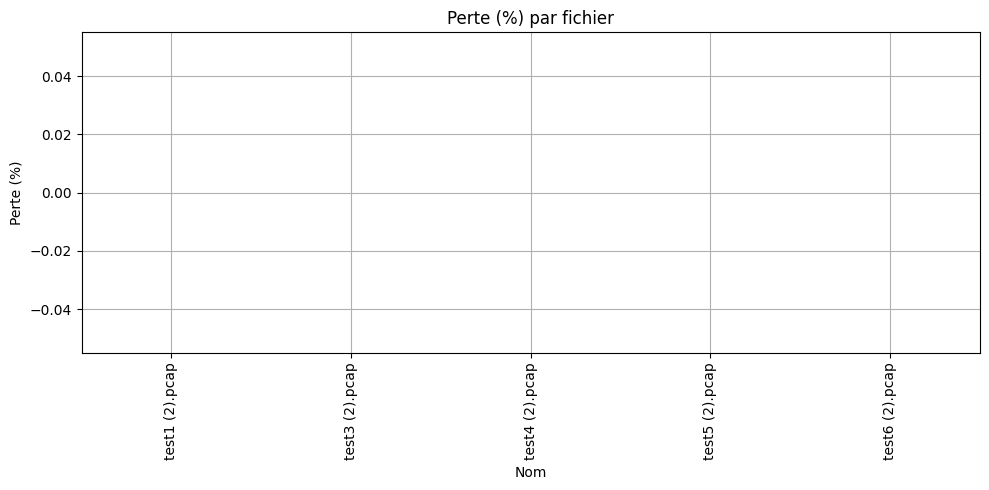

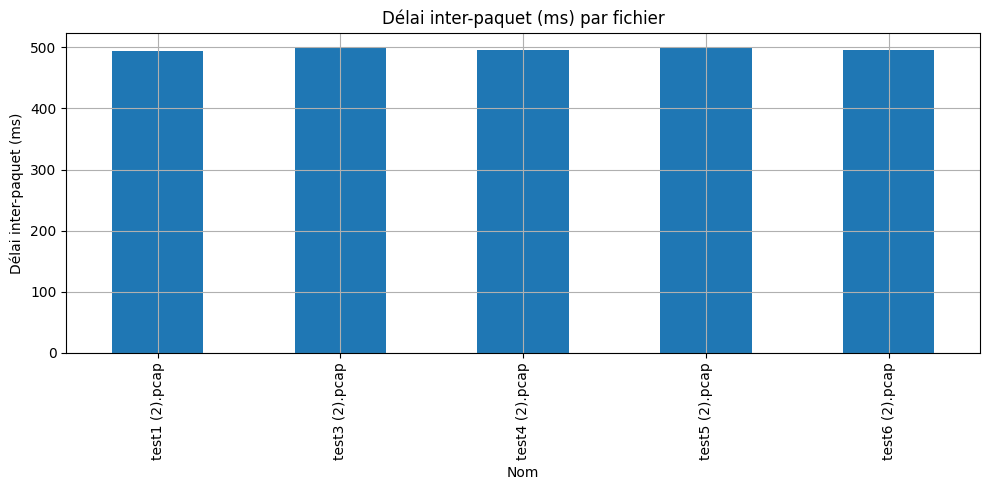

In [ ]:
# 1. Upload de plusieurs fichiers pcap
from google.colab import files
uploaded = files.upload()

# 2. Import des bibliothèques nécessaires
from scapy.all import rdpcap, IP, ICMP
import matplotlib.pyplot as plt
import pandas as pd

# 3. Fonction pour analyser un fichier pcap
def analyze_pcap(pcap_file):
    packets = rdpcap(pcap_file)

    sent_times = {}
    rtts = []
    total_bytes = 0
    first_time, last_time = None, None
    icmp_times = []

    for pkt in packets:
        if IP in pkt and ICMP in pkt and pkt[ICMP].type in [0, 8]:
            icmp_type = pkt[ICMP].type
            key = (pkt[ICMP].id, pkt[ICMP].seq)
            time = pkt.time
            size = len(pkt)

            if first_time is None:
                first_time = time
            last_time = time

            total_bytes += size
            icmp_times.append(time)

            if icmp_type == 8:
                sent_times[key] = time
            elif icmp_type == 0 and key in sent_times:
                rtt = (time - sent_times[key]) * 1000
                rtts.append(rtt)

    avg_rtt = sum(rtts) / len(rtts) if rtts else 0
    jitters = [abs(rtts[i] - rtts[i-1]) for i in range(1, len(rtts))]
    avg_jitter = sum(jitters) / len(jitters) if jitters else 0
    duration = last_time - first_time if first_time and last_time else 0
    bitrate = (total_bytes * 8) / duration if duration > 0 else 0
    num_sent = len([pkt for pkt in packets if ICMP in pkt and pkt[ICMP].type == 8])
    num_received = len(rtts)
    packet_loss = ((num_sent - num_received) / num_sent) * 100 if num_sent > 0 else 0
    inter_packet_delays = [(icmp_times[i] - icmp_times[i-1]) * 1000 for i in range(1, len(icmp_times))]
    avg_inter_delay = sum(inter_packet_delays) / len(inter_packet_delays) if inter_packet_delays else 0

    return {
        "Fichier": pcap_file,
        "Latence (ms)": avg_rtt,
        "Jitter (ms)": avg_jitter,
        "Débit (kbps)": bitrate / 1000,
        "Perte (%)": packet_loss,
        "Délai inter-paquet (ms)": avg_inter_delay
    }

# 4. Appliquer l’analyse à chaque fichier
results = []
for filename in uploaded:
    res = analyze_pcap(filename)
    results.append(res)

# 5. Convertir les résultats en DataFrame
df = pd.DataFrame(results)
df["Nom"] = df["Fichier"].apply(lambda x: x.split('/')[-1] if '/' in x else x)
df = df.set_index("Nom")
display(df)
# Forcer les colonnes numériques à être de type float
cols = ["Latence (ms)", "Jitter (ms)", "Débit (kbps)", "Perte (%)", "Délai inter-paquet (ms)"]
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

# Vérifier les types (optionnel pour debug)
print(df.dtypes)

# Affichage du graphe avec toutes les métriques
df[cols].plot(
    kind="bar", figsize=(14, 7),
    title="Comparaison des métriques ICMP par fichier"
)
plt.ylabel("Valeurs")
plt.grid(True)
plt.tight_layout()
plt.show()

# 6. Visualisation
df[["Latence (ms)", "Jitter (ms)", "Débit (kbps)", "Perte (%)", "Délai inter-paquet (ms)"]].plot(
    kind="bar", figsize=(14, 7), title="Comparaison des métriques ICMP par fichier")
plt.ylabel("Valeurs")
plt.grid(True)
plt.tight_layout()
plt.show()
for col in cols:
    df[[col]].plot(kind='bar', figsize=(10, 5), title=f"{col} par fichier", legend=False)
    plt.ylabel(col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

